In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### Key attributes of the database

The database includes the following indicators:
	
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]  
•	`country_long` (text): longer form of the country designation  
•	`name` (text): name or title of the power plant, generally in Romanized form  
•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant  
•	`capacity_mw` (number): electrical generating capacity in megawatts  
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)  
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)  
•	`primary_fuel` (text): energy source used in primary electricity generation or export  
•	`other_fuel1` (text): energy source used in electricity generation or export  
•	`other_fuel2` (text): energy source used in electricity generation or export  
•	`other_fuel3` (text): energy source used in electricity generation or export  
•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available  
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form  
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form  
•	`url` (text): web document corresponding to the `source` field  
•	`geolocation_source` (text): attribution for geolocation information  
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.  
•	`year_of_capacity_data` (number): year the capacity information was reported  
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013  
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014  
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015  
•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016  
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017  
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018  
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019  
•	`generation_data_source` (text): attribution for the reported generation information  
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013  
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014   
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015   
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016   
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017   
•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013  
•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014   
•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015  
•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016  
•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017   
Fuel Type Aggregation  
We define the "Fuel Type" attribute of our database based on common fuel categories.   
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw   


# Importing Dataset

In [2]:
df=pd.read_csv(r'E:\fliprobo technologies\projects\Evaluation projects\Evaluation projects 2nd\Global_Power_Plant_Database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data analysis (EDA)

In [3]:
df.shape

(907, 27)

the dataset contains 907 rows and 27 columns.Out of which 1 is target variable(label,Dependent variable) and remaining 26 are independent variables(features,input variables)

In [4]:
# checking the column of the dataset and we are storeing it in the list 
df.columns.tolist()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

# checking the null values

In [5]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

there are null values persent in latitude,longitude,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner
,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,
generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

on checking the info we found that there are null values present in most of the columns. data type of the columns are float and object 

In [7]:
# checking value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

IND    907
Name: country, dtype: int64


India    907
Name: country_long, dtype: int64


ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64


WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64


5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     

# Dropping unwanted columns

In [8]:
df.drop(['country','other_fuel1','generation_data_source','year_of_capacity_data','country_long','gppd_idnr','commissioning_year','other_fuel2','other_fuel3','owner','source','geolocation_source','url','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1,inplace=True)
df

,name,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,NaN,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,NaN


In [9]:
df.isnull().sum()

name                     0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [10]:
df.dtypes

name                    object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [11]:
# take the mean to replace nan in continous data
generation_gwh_2014_mean = df['generation_gwh_2014'].mean()
generation_gwh_2015_mean= df['generation_gwh_2015'].mean()
generation_gwh_2016_mean=df['generation_gwh_2016'].mean()
generation_gwh_2017_mean=df['generation_gwh_2017'].mean()
generation_gwh_2018_mean=df['generation_gwh_2018'].mean()
latitude_mean=df["latitude"].mean()
longitude_mean=df["longitude"].mean()

In [12]:
# Replace NaN values with the mean in generation_gwh and latitude and longitude
df['generation_gwh_2014'].fillna(generation_gwh_2014_mean, inplace=True)
df['generation_gwh_2015'].fillna(generation_gwh_2015_mean, inplace=True)
df['generation_gwh_2016'].fillna(generation_gwh_2016_mean, inplace=True)
df['generation_gwh_2017'].fillna(generation_gwh_2017_mean, inplace=True)
df['generation_gwh_2018'].fillna(generation_gwh_2018_mean, inplace=True)
df["latitude"].fillna(latitude_mean,inplace=True)
df["longitude"].fillna(longitude_mean,inplace=True)

In [13]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,2431.823590,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [14]:
df.dtypes

name                    object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [15]:
df.isnull().sum()

name                   0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

there are no null values left in any of the columns

In [16]:
# checking the unique values in targrt variable(label)
# checking the number of unique values
df["primary_fuel"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

These are the 8 categories present in the target column namely 'Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'
By looking at this we can say that, this is a multiclass Classification problem

In [17]:
# checking count of each unique values in target column
# i am using value_counts() function so that i can fetch out the count value
df["primary_fuel"].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

# Description of Dataset

In [18]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


The counts of all the columns are same which means there are no missing values in the dataset.there are no difference between mean and median means there is no skewness present

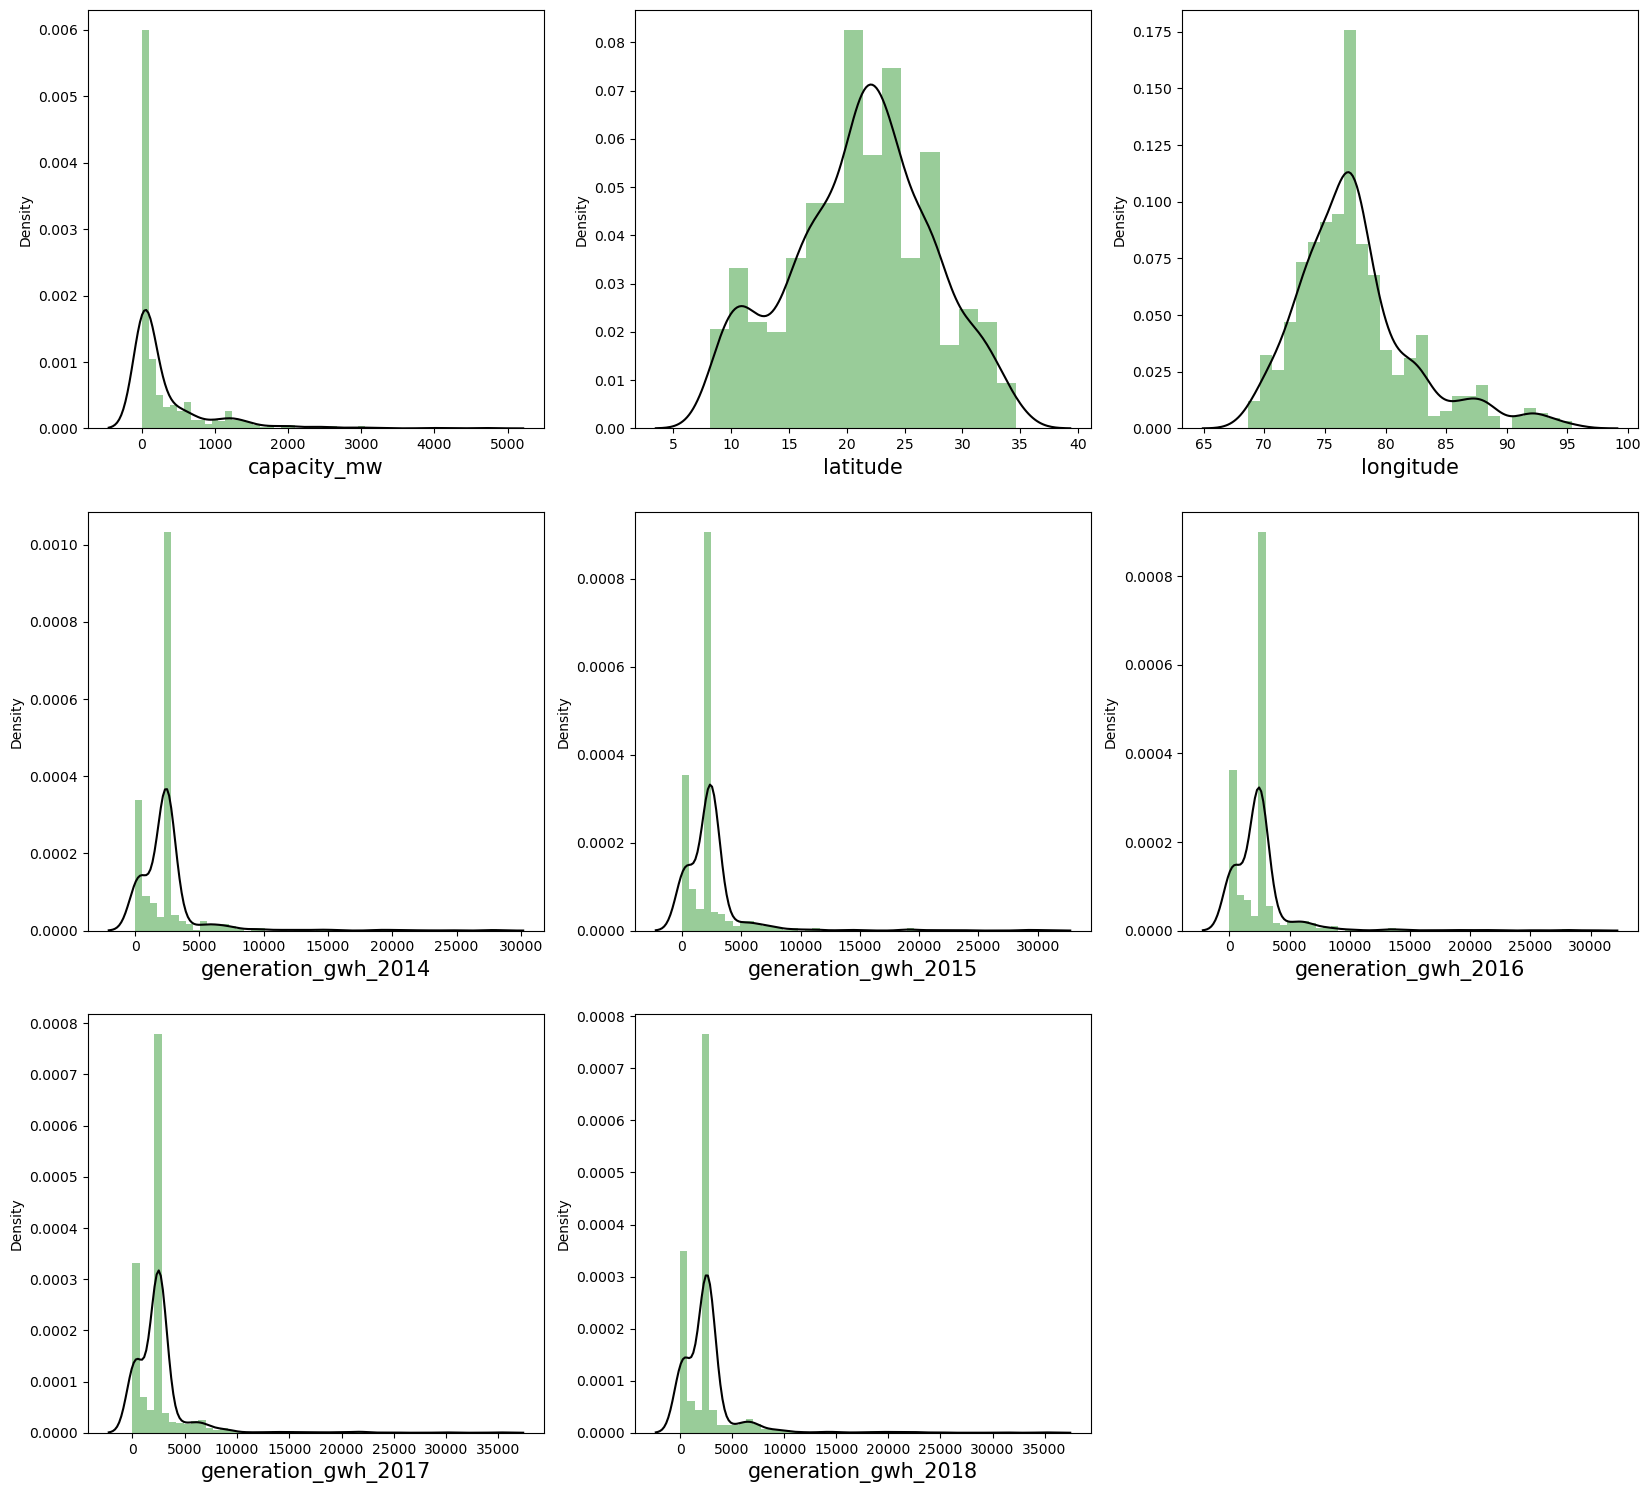

In [19]:
# lets check how data is distributed
plt.figure(figsize=(20,25))
plot=1
for i in df:
    if df.dtypes[i] !='object':
        if plot<=20:
            plt.subplot(4,3,plot)
            sns.distplot(df[i],color='g',kde_kws={"color": "k"})
            plt.xlabel(i,fontsize=15)
        plot+=1
plt.show() 

on checking the graph we found some skewness in generastion_ghw_years

# Checking for Outliers

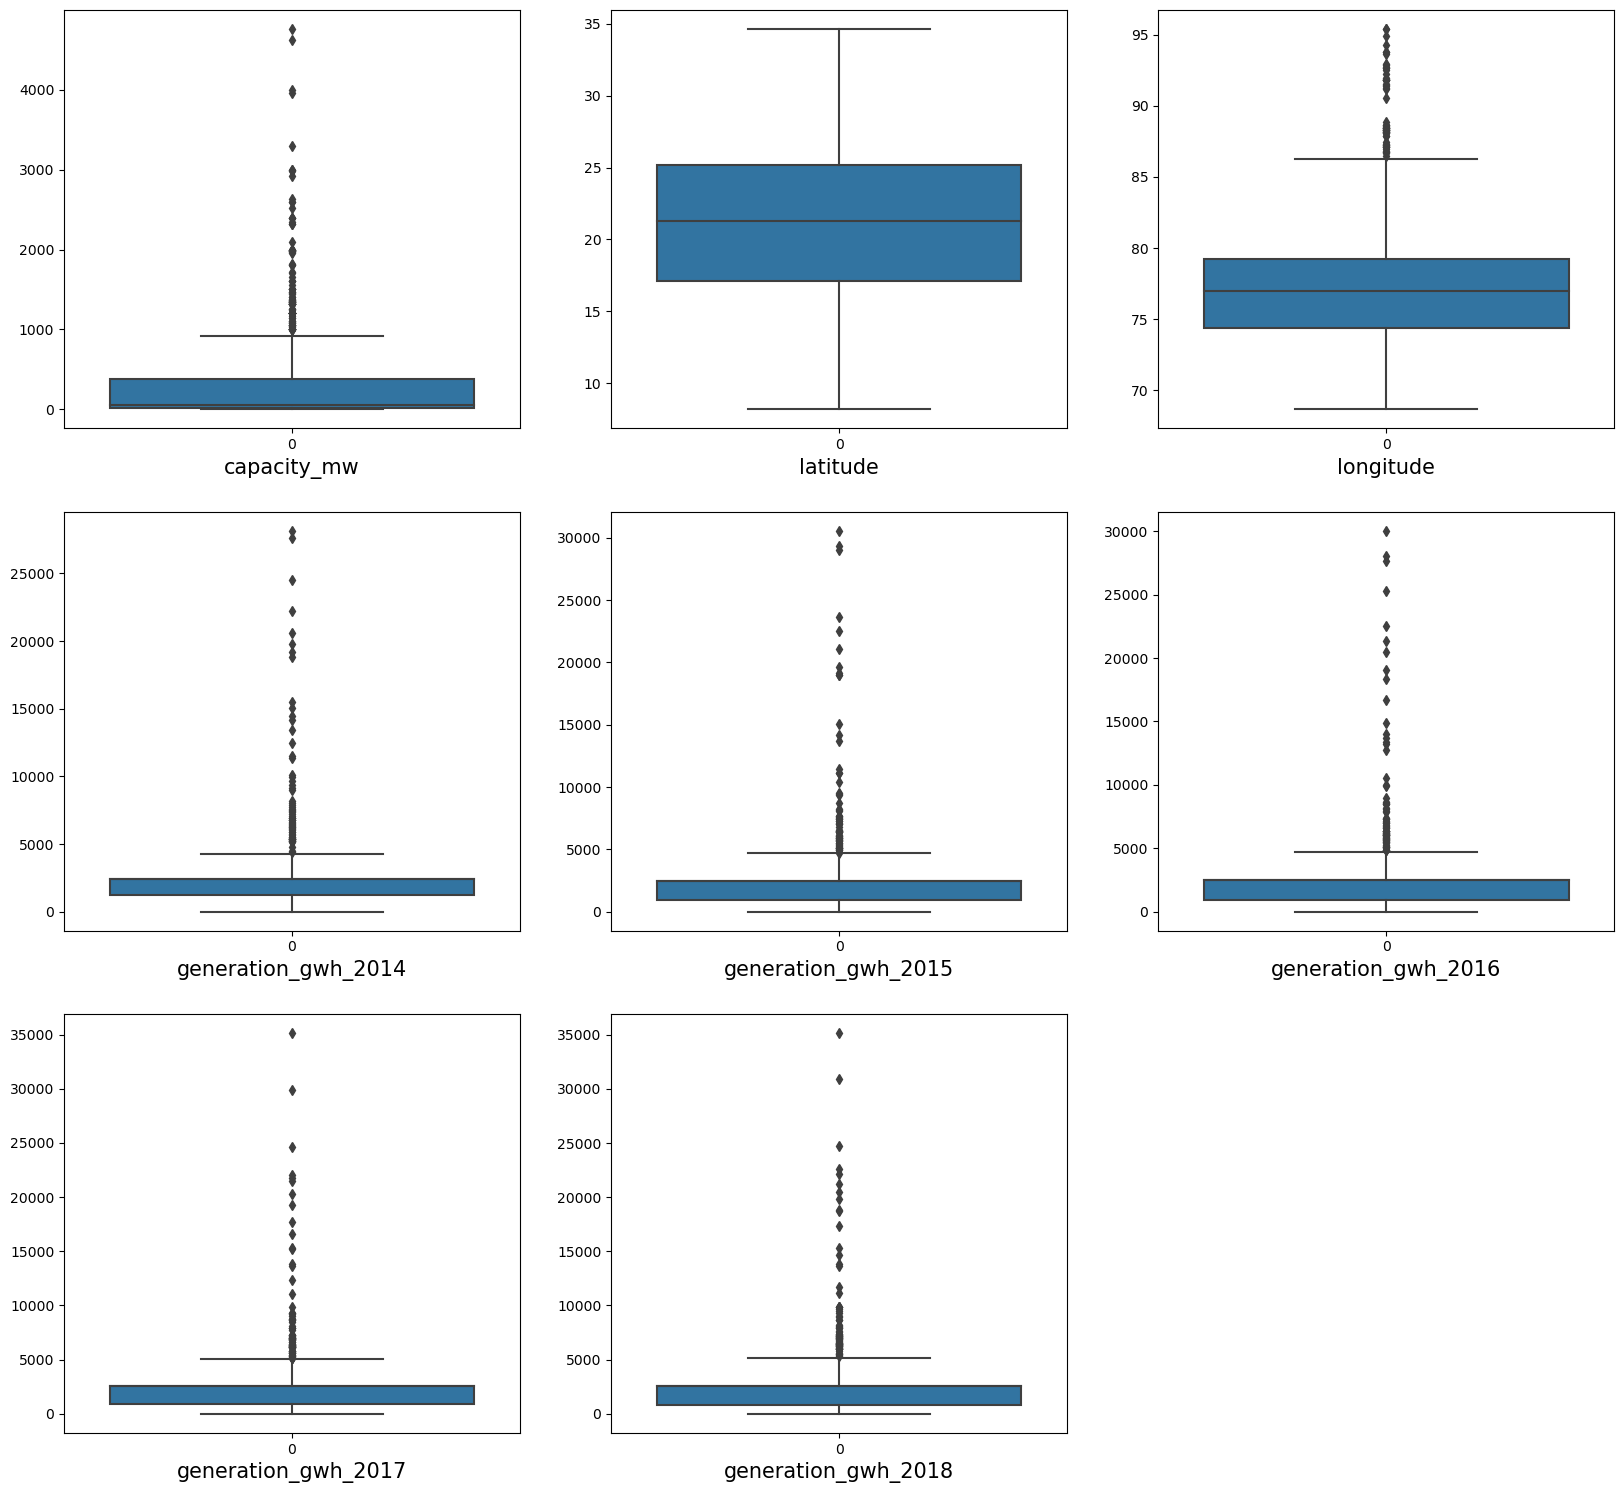

In [20]:
plt.figure(figsize=(20,25))
plot=1
for i in df:
    if df.dtypes[i] !='object':
        if plot<=20:
            plt.subplot(4,3,plot)
            sns.boxplot(data=df[i])
            plt.xlabel(i,fontsize=15)
        plot+=1
plt.show()

There are a large number of outliers present in all the features that is needed to be removed.

# Encoding categorical columns

In [21]:
# here i am using Ordinal Encoder for encoding categorical column
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,name,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.0,2.5,28.1839,73.2407,6.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,1.0,98.0,24.7663,74.6090,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,2.0,39.2,21.9038,69.3732,7.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,3.0,135.0,23.8712,91.3602,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,4.0,1800.0,21.9603,82.4091,1.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...
902,902.0,1600.0,16.2949,77.3568,1.0,2431.823590,0.994875,233.596650,865.400000,686.500000
903,903.0,3.0,12.8932,78.1654,6.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,904.0,25.5,15.2758,75.5811,7.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,905.0,80.0,24.3500,73.7477,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 907 non-null    float64
 1   capacity_mw          907 non-null    float64
 2   latitude             907 non-null    float64
 3   longitude            907 non-null    float64
 4   primary_fuel         907 non-null    float64
 5   generation_gwh_2014  907 non-null    float64
 6   generation_gwh_2015  907 non-null    float64
 7   generation_gwh_2016  907 non-null    float64
 8   generation_gwh_2017  907 non-null    float64
 9   generation_gwh_2018  907 non-null    float64
dtypes: float64(10)
memory usage: 71.0 KB


we have converted, the categorical columns using OrdinalEncoding method

# removing outliers

In [23]:
#Function to choose the right threshold 
def threhold(z,d):
    for i in np.arange(3,4,0.01):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,2),np.round(loss,2))) 

In [24]:
#Using zscore method to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threhold(z,df)

With threshold 3.0 data loss is 4.3%
With threshold 3.01 data loss is 4.19%
With threshold 3.02 data loss is 4.08%
With threshold 3.03 data loss is 4.08%
With threshold 3.04 data loss is 4.08%
With threshold 3.05 data loss is 4.08%
With threshold 3.06 data loss is 4.08%
With threshold 3.07 data loss is 3.97%
With threshold 3.08 data loss is 3.97%
With threshold 3.09 data loss is 3.97%
With threshold 3.1 data loss is 3.97%
With threshold 3.11 data loss is 3.97%
With threshold 3.12 data loss is 3.97%
With threshold 3.13 data loss is 3.86%
With threshold 3.14 data loss is 3.86%
With threshold 3.15 data loss is 3.86%
With threshold 3.16 data loss is 3.86%
With threshold 3.17 data loss is 3.53%
With threshold 3.18 data loss is 3.53%
With threshold 3.19 data loss is 3.53%
With threshold 3.2 data loss is 3.53%
With threshold 3.21 data loss is 3.42%
With threshold 3.22 data loss is 3.42%
With threshold 3.23 data loss is 3.31%
With threshold 3.24 data loss is 3.31%
With threshold 3.25 data loss

In [25]:
#We use threshold as 3.39 because we cannot afford to loose much data
df=df[(z<3.39).all(axis=1)]

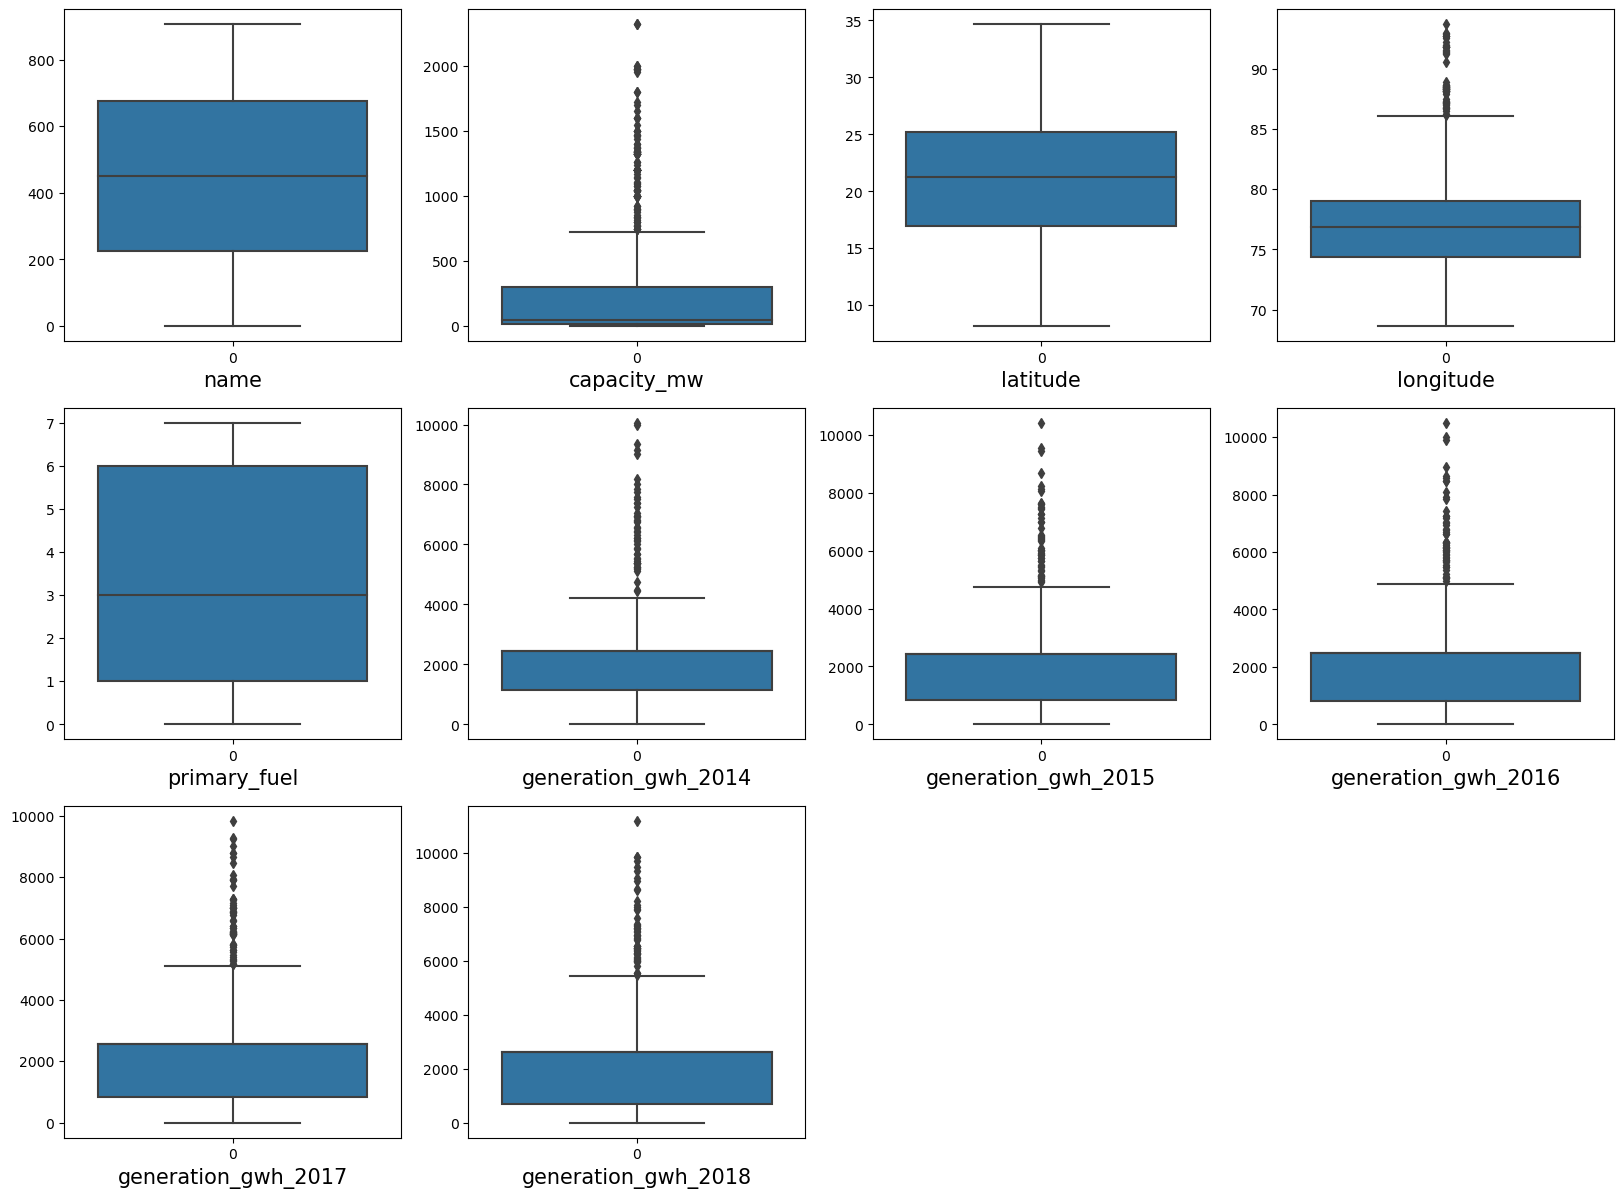

In [26]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for col in df:
    if plotnumber<=20:
        ac=plt.subplot(5,4,plotnumber)
        sns.boxplot(data=df[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.show()

outliers removed

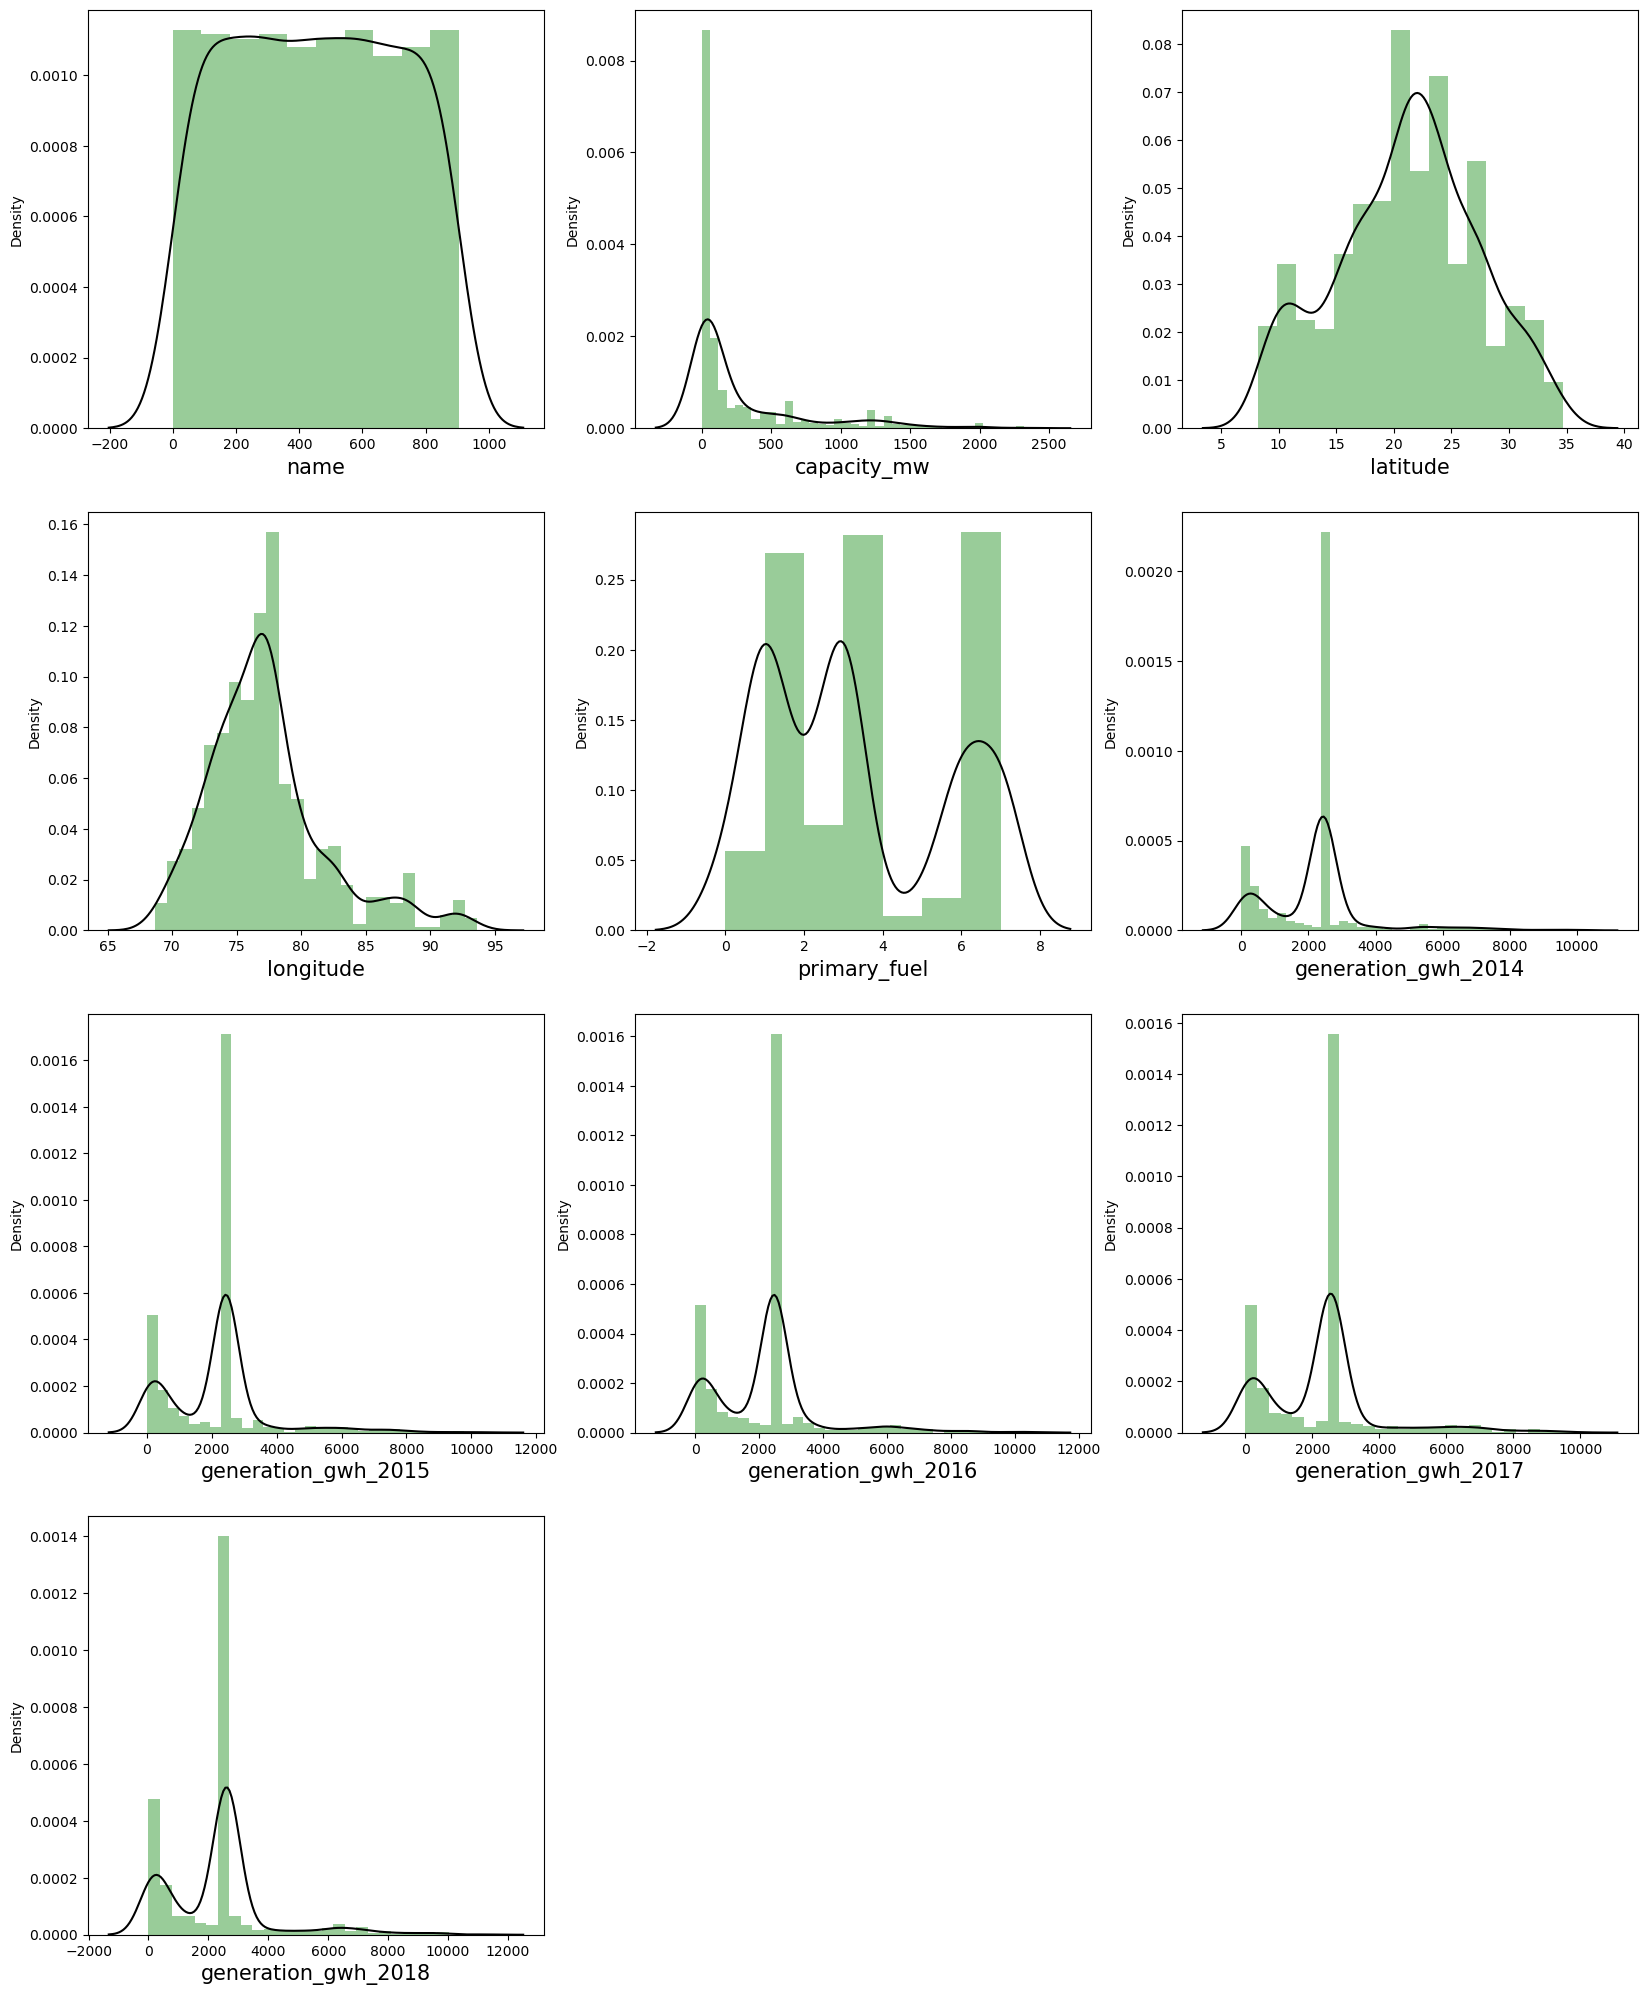

In [27]:
plt.figure(figsize=(20,25))
plot=1
for i in df:
    if df.dtypes[i] !='object':
        if plot<=20:
            plt.subplot(4,3,plot)
            sns.distplot(df[i],color='g',kde_kws={"color": "k"})
            plt.xlabel(i,fontsize=15)
        plot+=1
plt.show() 

skewness present in capacity_mw and in all generation_ghw 

# checking skewness

In [28]:
df.skew()

name                   0.011071
capacity_mw            2.096194
latitude              -0.125082
longitude              1.089917
primary_fuel           0.428348
generation_gwh_2014    1.501245
generation_gwh_2015    1.378234
generation_gwh_2016    1.398028
generation_gwh_2017    1.278202
generation_gwh_2018    1.429332
dtype: float64

# Removing Skewness

In [29]:
import numpy as np

for i in df.columns:
    if i not in ["primary_fuel"]:
        if df[i].skew()<0.5 and df[i].skew()> -0.5:
            continue
        elif df[i].skew() > 0.5 or df[i].skew() < -0.5:
            df[i] = np.sqrt(df[i])

In [30]:
df.skew()

name                   0.011071
capacity_mw            1.225670
latitude              -0.125082
longitude              0.989466
primary_fuel           0.428348
generation_gwh_2014   -0.466282
generation_gwh_2015   -0.430276
generation_gwh_2016   -0.388665
generation_gwh_2017   -0.404440
generation_gwh_2018   -0.343375
dtype: float64

# correlation between target variable and independent variables.

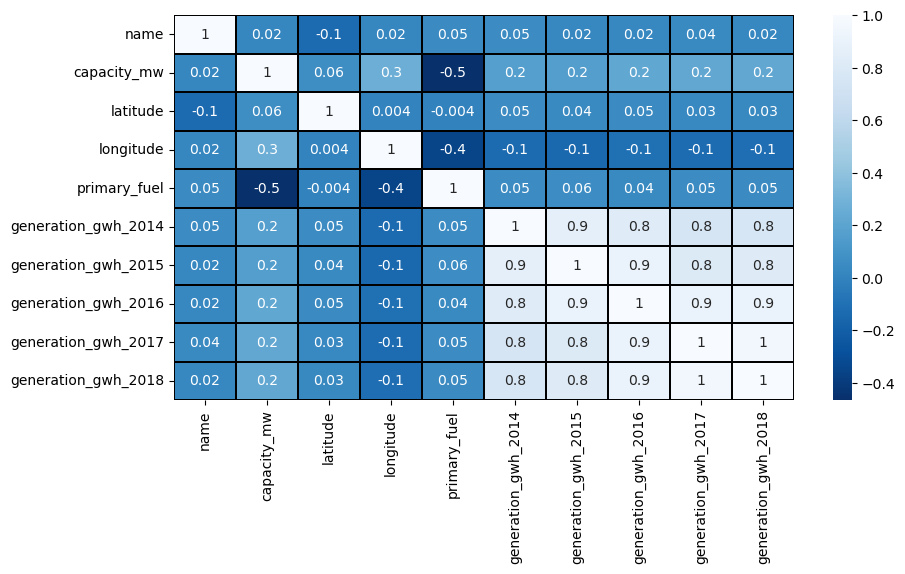

In [31]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".1g",linecolor='black',annot=True,cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

there are high correlation between the columns

# seperating features and label

In [32]:
x=df.drop("primary_fuel",axis=1)
y=df["primary_fuel"]

# Feature Scaling using Standard Scalarization

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,name,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.720015,-0.954268,1.150306,-0.888938,0.366195,0.387601,0.384093,0.383985,0.390849
1,-1.716203,-0.197056,0.593005,-0.579656,0.366195,0.387601,0.384093,0.383985,0.390849
2,-1.712391,-0.528266,0.126224,-1.779100,0.366195,0.387601,0.384093,0.383985,0.390849
3,-1.708580,-0.040536,0.447043,2.998563,-0.980434,-0.679517,-0.641314,-0.859066,-0.885554
4,-1.704768,2.763838,0.135437,1.131695,0.684560,1.845659,1.894683,1.536475,2.077382
...,...,...,...,...,...,...,...,...,...
875,1.718256,2.542964,-0.788407,0.032990,0.366195,-2.159149,-1.387071,-0.675268,-0.827743
876,1.722068,-0.940531,-1.343115,0.211195,0.366195,0.387601,0.384093,0.383985,0.390849
877,1.725880,-0.638523,-0.954589,-0.361648,0.366195,0.387601,0.384093,0.383985,0.390849
878,1.729692,-0.284009,0.525120,-0.774005,0.366195,0.387601,0.384093,0.383985,0.390849


We have Scaled the data using standard Scalarization method to overcome the issue of biasness

# Checking variance inflation factor

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.027806,name
1,1.172002,capacity_mw
2,1.028109,latitude
3,1.137322,longitude
4,4.237695,generation_gwh_2014
5,8.074673,generation_gwh_2015
6,12.005234,generation_gwh_2016
7,11.611483,generation_gwh_2017
8,12.295789,generation_gwh_2018


# Oversampling

In [35]:
# oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y =SM.fit_resample(x,y)

In [36]:
y.value_counts()

6.0    248
1.0    248
7.0    248
2.0    248
3.0    248
0.0    248
5.0    248
4.0    248
Name: primary_fuel, dtype: int64

# finding the best random state

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0         # maximum accuracy
maxRS=0           # maximum random state
for i in range(10,20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)   
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print(" Best accuracy is",maxAccu,"at random_state",maxRS)

 Best accuracy is 0.8640939597315436 at random_state 12


# creating train test split

In [38]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=maxRS)

# classification Algorithms

In [39]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [40]:
# checking accuracy for RandomForestclassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8523489932885906
[[69  3  0  1  0  0  0  1]
 [ 0 50  9  4  2  3  2  2]
 [ 0  3 45  2  0  2  0  0]
 [ 3  4  5 55  4  0  4  2]
 [ 0  1  0  0 72  1  1  0]
 [ 0  0  0  0  0 70  0  1]
 [ 1  4  0  1  0  0 85  3]
 [ 5  1  3  5  0  0  5 62]]
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91        74
         1.0       0.76      0.69      0.72        72
         2.0       0.73      0.87      0.79        52
         3.0       0.81      0.71      0.76        77
         4.0       0.92      0.96      0.94        75
         5.0       0.92      0.99      0.95        71
         6.0       0.88      0.90      0.89        94
         7.0       0.87      0.77      0.82        81

    accuracy                           0.85       596
   macro avg       0.85      0.85      0.85       596
weighted avg       0.85      0.85      0.85       596



In [41]:
# checking accuracy for LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.5453020134228188
[[51  0  0  0  0  0  5 18]
 [ 1 20 14  7 16  3  8  3]
 [ 0  8 33  3  2  1  0  5]
 [ 7  5 12 25  4 11 11  2]
 [ 0 10  0  2 61  2  0  0]
 [ 4  0  2  7  0 36  0 22]
 [12  0  0  1  0  1 73  7]
 [28  3  2  1  0  2 19 26]]
              precision    recall  f1-score   support

         0.0       0.50      0.69      0.58        74
         1.0       0.43      0.28      0.34        72
         2.0       0.52      0.63      0.57        52
         3.0       0.54      0.32      0.41        77
         4.0       0.73      0.81      0.77        75
         5.0       0.64      0.51      0.57        71
         6.0       0.63      0.78      0.70        94
         7.0       0.31      0.32      0.32        81

    accuracy                           0.55       596
   macro avg       0.54      0.54      0.53       596
weighted avg       0.54      0.55      0.53       596



In [42]:
# checking accuracy for Support Vector Machine Classifier
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6929530201342282
[[69  1  0  0  0  0  4  0]
 [ 2 29 13  7  7  2  9  3]
 [ 1  3 38  3  1  5  0  1]
 [ 9  4 12 38  3  3  7  1]
 [ 0  1  1  0 73  0  0  0]
 [ 3  0  0  0  0 68  0  0]
 [ 9  2  0  0  0  0 65 18]
 [27  3  0  0  0  3 15 33]]
              precision    recall  f1-score   support

         0.0       0.57      0.93      0.71        74
         1.0       0.67      0.40      0.50        72
         2.0       0.59      0.73      0.66        52
         3.0       0.79      0.49      0.61        77
         4.0       0.87      0.97      0.92        75
         5.0       0.84      0.96      0.89        71
         6.0       0.65      0.69      0.67        94
         7.0       0.59      0.41      0.48        81

    accuracy                           0.69       596
   macro avg       0.70      0.70      0.68       596
weighted avg       0.70      0.69      0.68       596



In [43]:
# checking accuracy for GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8187919463087249
[[70  2  0  1  0  0  0  1]
 [ 2 46  7  6  5  2  1  3]
 [ 0  1 44  3  0  3  0  1]
 [ 3  4  6 53  4  0  4  3]
 [ 0  5  2  1 66  1  0  0]
 [ 0  0  0  0  0 71  0  0]
 [ 2  2  3  3  0  0 78  6]
 [ 7  3  1  3  0  0  7 60]]
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89        74
         1.0       0.73      0.64      0.68        72
         2.0       0.70      0.85      0.77        52
         3.0       0.76      0.69      0.72        77
         4.0       0.88      0.88      0.88        75
         5.0       0.92      1.00      0.96        71
         6.0       0.87      0.83      0.85        94
         7.0       0.81      0.74      0.77        81

    accuracy                           0.82       596
   macro avg       0.81      0.82      0.81       596
weighted avg       0.82      0.82      0.82       596



In [44]:
# checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.2902684563758389
[[74  0  0  0  0  0  0  0]
 [18  1 28  0 25  0  0  0]
 [ 8  0 44  0  0  0  0  0]
 [22  3 51  0  1  0  0  0]
 [ 2 12  6  1 54  0  0  0]
 [26  0 45  0  0  0  0  0]
 [94  0  0  0  0  0  0  0]
 [81  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.23      1.00      0.37        74
         1.0       0.06      0.01      0.02        72
         2.0       0.25      0.85      0.39        52
         3.0       0.00      0.00      0.00        77
         4.0       0.68      0.72      0.70        75
         5.0       0.00      0.00      0.00        71
         6.0       0.00      0.00      0.00        94
         7.0       0.00      0.00      0.00        81

    accuracy                           0.29       596
   macro avg       0.15      0.32      0.18       596
weighted avg       0.14      0.29      0.17       596



In [45]:
# checking accuracy for Bagging Classifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8338926174496645
[[69  3  1  0  0  0  0  1]
 [ 1 48  6  7  3  3  3  1]
 [ 0  0 44  3  0  4  0  1]
 [ 2  2  9 55  3  0  3  3]
 [ 0  1  0  2 70  1  0  1]
 [ 0  0  0  0  0 70  0  1]
 [ 2  0  1  1  0  0 88  2]
 [ 7  4  1  5  0  0 11 53]]
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89        74
         1.0       0.83      0.67      0.74        72
         2.0       0.71      0.85      0.77        52
         3.0       0.75      0.71      0.73        77
         4.0       0.92      0.93      0.93        75
         5.0       0.90      0.99      0.94        71
         6.0       0.84      0.94      0.88        94
         7.0       0.84      0.65      0.74        81

    accuracy                           0.83       596
   macro avg       0.83      0.83      0.83       596
weighted avg       0.83      0.83      0.83       596



In [46]:
# checking accuracy for ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8640939597315436
[[69  2  0  1  0  0  0  2]
 [ 1 47  9  5  5  2  2  1]
 [ 0  2 48  2  0  0  0  0]
 [ 4  4  4 55  3  0  2  5]
 [ 0  1  0  0 74  0  0  0]
 [ 0  0  1  0  0 69  0  1]
 [ 0  3  0  0  0  0 86  5]
 [ 3  0  1  3  0  0  7 67]]
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91        74
         1.0       0.80      0.65      0.72        72
         2.0       0.76      0.92      0.83        52
         3.0       0.83      0.71      0.77        77
         4.0       0.90      0.99      0.94        75
         5.0       0.97      0.97      0.97        71
         6.0       0.89      0.91      0.90        94
         7.0       0.83      0.83      0.83        81

    accuracy                           0.86       596
   macro avg       0.86      0.87      0.86       596
weighted avg       0.86      0.86      0.86       596



# cross valdation score

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
# checking cv score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predRFC)-score.mean())

[0.81612091 0.8186398  0.8488665  0.83879093 0.82323232]
0.8291300918504948
Difference between Accuracy score and cross validation score is- 0.023218901438095796


In [49]:
# checking cv score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predLR)-score.mean())

[0.4231738  0.52141058 0.4861461  0.49874055 0.49242424]
0.48437905503396694
Difference between Accuracy score and cross validation score is- 0.06092295838885187


In [50]:
# checking cv score for Gradient Boosting Classifier
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predGB)-score.mean())

[0.77078086 0.76322418 0.80856423 0.79848866 0.75505051]
0.7792216879118643
Difference between Accuracy score and cross validation score is- 0.03957025839686057


In [51]:
# checking cv score for Support vector machine Classifier
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predsvc)-score.mean())

[0.62216625 0.67254408 0.68010076 0.70780856 0.66161616]
0.6688471617942652
Difference between Accuracy score and cross validation score is- 0.024105858339963038


In [52]:
# checking cv score for Adaboost Classifier
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predABC)-score.mean())

[0.2720403  0.33501259 0.31989924 0.31234257 0.34090909]
0.31604076024730937
Difference between Accuracy score and cross validation score is- -0.025772303871470448


In [53]:
# checking cv score for Bagging Classifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predBC)-score.mean())

[0.76070529 0.79093199 0.80856423 0.82619647 0.80808081]
0.7988957585934916
Difference between Accuracy score and cross validation score is- 0.034996858856172874


In [54]:
# checking cv score for Support ExtraTrees Classifier
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predET)-score.mean())

[0.82871537 0.83627204 0.85138539 0.85138539 0.85858586]
0.8452688089967687
Difference between Accuracy score and cross validation score is- 0.018825150734774865


Extratreeclassifier is our best model

# Hyper parameter tuning

In [55]:
# Extra Trees Classifier
from sklearn.model_selection import GridSearchCV

parameters={'criterion':['gini','entropy'],
           'random_state':[10,50,1000],
           'max_depth':[0,10,20],
           'n_jobs':[-2,-1,1],
           'n_estimators':[50,100,200,300]}

In [56]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [57]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [58]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 50}

In [59]:
Final_model=ExtraTreesClassifier(criterion= 'gini',max_depth= 20, n_estimators= 200,n_jobs= -2,random_state= 10)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

87.08053691275168


after hyper parameter tuning accuracy decreased

# saving the model

In [60]:
import joblib
joblib.dump(Final_model,"Gobalpowerplant.pkl")

['Gobalpowerplant.pkl']

# predicting by using the saved model

In [61]:
# lets load the saved model and get the prediction
model=joblib.load('Gobalpowerplant.pkl')

# predictions
prediction=model.predict(x_test)
prediction

array([2., 1., 0., 2., 4., 0., 1., 6., 0., 6., 7., 2., 0., 1., 1., 0., 1.,
       4., 5., 2., 3., 3., 6., 4., 7., 4., 3., 2., 3., 3., 0., 1., 1., 7.,
       5., 2., 6., 6., 6., 6., 0., 3., 4., 4., 3., 1., 4., 0., 1., 6., 0.,
       6., 6., 2., 2., 6., 3., 1., 1., 5., 1., 3., 6., 7., 0., 6., 4., 5.,
       0., 6., 0., 7., 0., 6., 6., 4., 0., 0., 3., 3., 4., 3., 4., 5., 6.,
       0., 4., 0., 6., 0., 0., 4., 2., 6., 1., 2., 7., 7., 4., 1., 5., 2.,
       3., 3., 2., 5., 0., 2., 7., 4., 7., 0., 6., 1., 3., 7., 0., 1., 1.,
       5., 7., 3., 7., 1., 6., 7., 1., 3., 4., 6., 4., 0., 7., 0., 0., 5.,
       2., 3., 5., 1., 3., 2., 5., 1., 3., 0., 1., 3., 3., 6., 7., 1., 3.,
       5., 7., 6., 6., 1., 5., 3., 6., 1., 6., 5., 5., 2., 4., 4., 2., 4.,
       0., 4., 7., 7., 5., 6., 1., 5., 3., 4., 5., 1., 6., 5., 6., 6., 4.,
       6., 0., 6., 4., 0., 0., 2., 7., 0., 7., 4., 2., 4., 3., 2., 2., 4.,
       1., 3., 0., 5., 6., 6., 3., 7., 6., 3., 6., 4., 6., 7., 5., 4., 7.,
       4., 4., 7., 4., 0.

# check how my model is behaving

In [62]:
# creating a dataframe
conclusion=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted FUEL","Original FUEL"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,586,587,588,589,590,591,592,593,594,595
Predicted FUEL,2.0,1.0,0.0,2.0,4.0,0.0,1.0,6.0,0.0,6.0,...,0.0,5.0,0.0,7.0,5.0,2.0,7.0,2.0,5.0,0.0
Original FUEL,2.0,1.0,0.0,4.0,4.0,0.0,1.0,6.0,0.0,6.0,...,0.0,5.0,0.0,7.0,5.0,5.0,7.0,1.0,5.0,0.0


# creating model for Predicting capacity megawatt

## seperating features and label

In [63]:
x=df.drop("capacity_mw",axis=1)
y=df["capacity_mw"]

# Feature Scaling using Standard Scalarization

In [64]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
#x

We have Scaled the data using standard Scalarization method to overcome the issue of biasness

# Checking variance inflation factor

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,4.082015,name
1,13.102557,latitude
2,22.602110,longitude
3,2.990620,primary_fuel
4,27.560005,generation_gwh_2014
5,46.931108,generation_gwh_2015
6,67.891574,generation_gwh_2016
7,65.197402,generation_gwh_2017
8,67.287130,generation_gwh_2018


In [66]:
# Dropping column
x.drop(['generation_gwh_2014','generation_gwh_2015','generation_gwh_2017'],axis=1,inplace=True)

# finding the best random state

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [68]:
maxAccu=0        
maxRS=0           
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print(" Maximum r2 score is",maxAccu,"on random_state",maxRS)

 Maximum r2 score is 0.3802452813188161 on random_state 57


# creating train test split

In [69]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=maxRS)

# Modelling

In [70]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor

In [71]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_lr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_lr))
print("Mean squared error:",mean_squared_error(y_test,pred_lr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score: 0.3802452813188161
R2_score on training Data: 26.69522493628823
Mean absolute error: 6.759340281290147
Mean squared error: 73.4125842411118
Root Mean absolute error: 8.568114392391818


In [72]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_rfr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_rfr))
print("Mean squared error:",mean_squared_error(y_test,pred_rfr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2 score: 0.8435902026490669
R2_score on training Data: 97.215704131782
Mean absolute error: 2.933310622230419
Mean squared error: 18.527406210952037
Root Mean absolute error: 4.304347361790407


In [73]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print("R2 score:",r2_score(y_test,pred_knn))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_knn))
print("Mean squared error:",mean_squared_error(y_test,pred_knn))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score: 0.42816629448580734
R2_score on training Data: 58.62544718365111
Mean absolute error: 5.553427455112131
Mean squared error: 67.73613626903769
Root Mean absolute error: 8.230196611809324


In [74]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
pred_train=gbr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_gbr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_gbr))
print("Mean squared error:",mean_squared_error(y_test,pred_gbr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_gbr)))

R2 score: 0.7889269157558029
R2_score on training Data: 93.21023835666864
Mean absolute error: 3.275987438918506
Mean squared error: 25.002505202513206
Root Mean absolute error: 5.000250513975596


In [75]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_dtr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_dtr))
print("Mean squared error:",mean_squared_error(y_test,pred_dtr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 score: 0.6795138539630357
R2_score on training Data: 100.0
Mean absolute error: 3.940768055180855
Mean squared error: 37.962948058086674
Root Mean absolute error: 6.161407960692643


In [76]:
Lasso=Lasso()
Lasso.fit(x_train,y_train)
pred_Lasso=Lasso.predict(x_test)
pred_train=Lasso.predict(x_train)
print("R2 score:",r2_score(y_test,pred_Lasso))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_Lasso))
print("Mean squared error:",mean_squared_error(y_test,pred_Lasso))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_Lasso)))

R2 score: 0.355795520918179
R2_score on training Data: 24.489526099673842
Mean absolute error: 6.84467972269185
Mean squared error: 76.30876242416186
Root Mean absolute error: 8.735488676895063


In [77]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print("R2 score:",r2_score(y_test,pred_rd))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_rd))
print("Mean squared error:",mean_squared_error(y_test,pred_rd))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_rd)))

R2 score: 0.3805693905432562
R2_score on training Data: 26.69344583657368
Mean absolute error: 6.754391752854936
Mean squared error: 73.37419212399624
Root Mean absolute error: 8.565873692974712


In [78]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_svr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_svr))
print("Mean squared error:",mean_squared_error(y_test,pred_svr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_svr)))

R2 score: -0.24838440693941743
R2_score on training Data: -21.332764961221585
Mean absolute error: 7.983957507753031
Mean squared error: 147.876446402461
Root Mean absolute error: 12.160445978764965


In [79]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_etr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_etr))
print("Mean squared error:",mean_squared_error(y_test,pred_etr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_etr)))

R2 score: 0.8440781777636333
R2_score on training Data: 100.0
Mean absolute error: 2.9036321595883314
Mean squared error: 18.46960348170151
Root Mean absolute error: 4.2976276574060615


In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_lr)-score.mean())*100)

[0.31876502 0.14950467 0.2805423  0.31888459 0.3132747 ]
0.2761942560190368
Difference between R2 score and cross validation score is 10.405102529977928


In [82]:
score1=cross_val_score(rfr,x,y)
print(score1)
print(score1.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_rfr)-score1.mean())*100)

[0.81674567 0.85352824 0.76736225 0.82473394 0.82872127]
0.8182182758602451
Difference between R2 score and cross validation score is 2.537192678882183


In [83]:
score2=cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_knn)-score2.mean())*100)

[-0.16126759  0.16108378  0.20048149  0.06418285  0.13873568]
0.08064324146581761
Difference between R2 score and cross validation score is 34.75230530199897


In [84]:
score3=cross_val_score(gbr,x,y)
print(score3)
print(score3.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_gbr)-score3.mean())*100)

[0.84651728 0.86830208 0.75322122 0.79333027 0.74450896]
0.8011759612379276
Difference between R2 score and cross validation score is -1.2249045482124687


In [85]:
score4=cross_val_score(dtr,x,y)
print(score4)
print(score4.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_dtr)-score4.mean())*100)

[0.63022207 0.72292962 0.65021078 0.6488943  0.72458684]
0.6753687229378567
Difference between R2 score and cross validation score is 0.4145131025178994


In [86]:
score5=cross_val_score(Lasso,x,y)
print(score5)
print(score5.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_Lasso)-score5.mean())*100)

[0.27739418 0.16915745 0.25134978 0.29269444 0.33329372]
0.2647779132579486
Difference between R2 score and cross validation score is 9.101760766023043


In [87]:
score6=cross_val_score(rd,x,y)
print(score6)
print(score6.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_rd)-score6.mean())*100)

[0.31815686 0.15065908 0.28007558 0.31874191 0.31483059]
0.27649280581708213
Difference between R2 score and cross validation score is 10.40765847261741


In [88]:
score7=cross_val_score(svr,x,y)
print(score7)
print(score7.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_svr)-score7.mean())*100)

[-0.23186356 -0.19665023 -0.18650398 -0.35839519 -0.14169862]
-0.22302231429227884
Difference between R2 score and cross validation score is -2.5362092647138597


In [89]:
score8=cross_val_score(etr,x,y)
print(score8)
print(score8.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_etr)-score8.mean())*100)

[0.85364655 0.83865976 0.7771022  0.85409066 0.81441063]
0.8275819600782347
Difference between R2 score and cross validation score is 1.649621768539855


Decisiontree regressor is our best model

In [90]:
from sklearn.model_selection import GridSearchCV

parameters={
           'n_estimators': [100, 200],
    'max_depth': [3, 5,None],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]}

In [91]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5) 

In [92]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, None], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]})

In [93]:
GCV.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [94]:
final_model=RandomForestRegressor(max_depth=None,
    min_samples_split=2,
    min_samples_leaf=2,
    n_estimators= 200)
final_model.fit(x_train,y_train)
Pred=final_model.predict(x_test)
print("R2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred)))

R2 score: -0.18420785484125224
Mean absolute error: 9.23771907616981
Mean squared error: 140.27446065681588
Root Mean absolute error: 11.843751967042195


# saving the model

In [95]:
import pickle
file="Gobalpowerplantcapacity.pkl"
pickle.dump(final_model,open(file,'wb'))

# predicting by using the saved model

In [96]:
import pickle
model=pickle.load(open("Gobalpowerplantcapacity.pkl",'rb'))

# predictions
prediction=model.score(x_test,y_test)
print(prediction*100)

85.87157531922222


# check how my model is behaving

In [97]:
conclu=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted_capacity","Original_capacity"])
conclu

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
Predicted_capacity,7.559122,11.794084,4.740131,3.071932,2.927948,3.480953,5.642146,3.874642,22.352360,6.546727,...,3.390474,20.975120,4.487183,7.325480,10.120104,18.392909,5.458618,8.033379,21.993076,10.780098
Original_capacity,7.141428,7.745967,4.449719,1.732051,2.236068,2.121320,3.162278,3.162278,15.491933,7.745967,...,6.324555,34.641016,3.240370,5.477226,10.281051,21.447611,10.000000,7.745967,22.360680,3.937004
